In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from collections import Counter

In [ ]:
df=pd.read_csv('Brain Tumor.csv')
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


#Variable Description

**First Order Features**

Mean

Variance

Standard Deviation

Skewness

Kurtosis

**Second Order Features**

Contrast

Energy

ASM (Angular second moment)

Entropy

Homogeneity

Dissimilarity

Correlation

Coarseness

#**Part 1,2**#

In [ ]:
df.set_index(['Image'], inplace=True) # set the image column as an index variable


**Missing values**

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, Image1 to Image3762
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   Skewness            3762 non-null   float64
 6   Kurtosis            3762 non-null   float64
 7   Contrast            3762 non-null   float64
 8   Energy              3762 non-null   float64
 9   ASM                 3762 non-null   float64
 10  Homogeneity         3762 non-null   float64
 11  Dissimilarity       3762 non-null   float64
 12  Correlation         3762 non-null   float64
 13  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 440.9+ KB


**Infinite values**

In [ ]:
ds = df.isin([np.inf]).sum().sum()

In [ ]:
print(ds)
df.shape

0


(3762, 14)

**Duplicates**

In [ ]:
df.drop_duplicates()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Image,,,,,,,,,,,,,,
Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155


**Outlier detection**

In [ ]:
def detect_outliers(dfl, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(dfl[c],25)
        #3rd quartile
        Q3 = np.percentile(dfl[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = dfl[(dfl[c] < Q1 - outlier_step) | (dfl[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,["Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"])]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Image,,,,,,,,,,,,,,
Image70,0,32.974335,2630.774546,51.291077,0.058575,1.990064,4.263510,386.946380,0.211036,0.044536,0.500845,6.379274,0.944384,7.458341e-155
Image687,0,32.832153,2598.678936,50.977239,0.058397,1.986680,4.252588,352.123803,0.210743,0.044413,0.484549,6.569327,0.948522,7.458341e-155
Image688,0,30.854248,2470.834261,49.707487,0.055421,2.061911,4.543874,390.810324,0.204924,0.041994,0.492595,6.407239,0.939324,7.458341e-155
Image898,1,27.777878,2514.006331,50.139868,0.027225,2.278691,5.446137,178.210179,0.141348,0.019979,0.495875,4.166667,0.965503,7.458341e-155
Image1116,0,32.206467,2604.354097,51.032873,0.056008,2.019719,4.381090,423.663642,0.206095,0.042475,0.502325,6.503498,0.939392,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image2019,1,3.244949,373.645816,19.329920,0.007513,6.608718,45.579790,502.839177,0.073153,0.005351,0.330291,9.558205,0.892741,7.458341e-155
Image2428,1,7.558182,920.975312,30.347575,0.001708,4.521819,21.463864,361.850250,0.034499,0.001190,0.265279,9.771750,0.895138,7.458341e-155
Image3238,1,7.219604,900.344489,30.005741,0.010625,4.480255,20.410193,376.339211,0.087184,0.007601,0.382338,6.041842,0.901592,7.458341e-155


In [ ]:
# drop Outliers
df = df.drop(detect_outliers(df,["Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"]),axis=0).reset_index(drop=True)

#Visualization

In [ ]:
df['Class'].value_counts() # target column which can tell the image has a tumor or not

0    2060
1    1534
Name: Class, dtype: int64

In [ ]:
len_ = len(df)

In [ ]:
#number of non positive tumors 
(df['Class']==0).sum()

2060

In [ ]:
# created a filter of number of non positive tumors
pos_tum = df['Class'] == 0

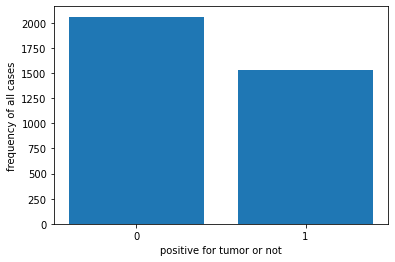

In [ ]:
plt.bar([0, 1], [(df['Class']==0).sum(), len_-(df['Class']==0).sum()])
plt.xticks([0, 1])
plt.ylabel('frequency of all cases')
plt.xlabel('positive for tumor or not')
plt.show()

In [ ]:
From here we can see that non positive for tumor cases are more frequent than the positive for tumor cases( Positive cases are 1683 and negative cases are 2079)

SyntaxError: ignored

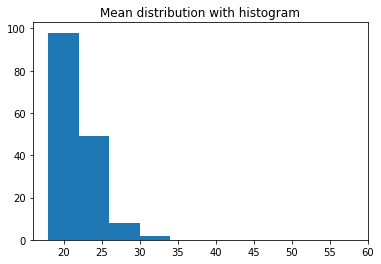

In [ ]:
plt.hist(df.loc[~pos_tum, 'Mean'], bins=np.arange(18, 60, 4));
plt.title('Mean distribution with histogram');

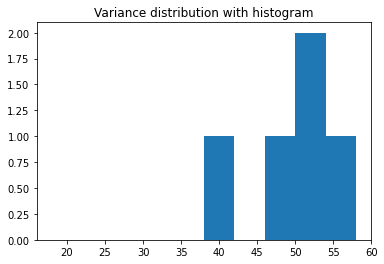

In [ ]:
plt.hist(df.loc[~pos_tum, 'Variance'], bins=np.arange(18, 60, 4));
plt.title('Variance distribution with histogram');

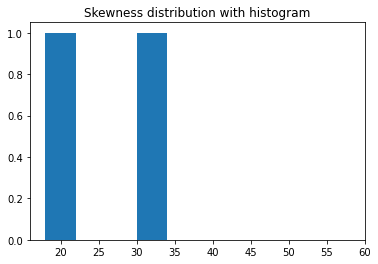

In [ ]:
plt.hist(df.loc[~pos_tum, 'Skewness'], bins=np.arange(18, 60, 4));
plt.title('Skewness distribution with histogram');

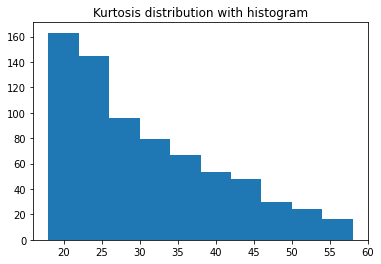

In [ ]:
plt.hist(df.loc[~pos_tum, 'Kurtosis'], bins=np.arange(18, 60, 4));
plt.title('Kurtosis distribution with histogram');

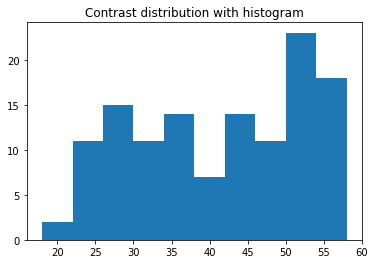

In [ ]:
plt.hist(df.loc[~pos_tum, 'Contrast'], bins=np.arange(18, 60, 4));
plt.title('Contrast distribution with histogram');

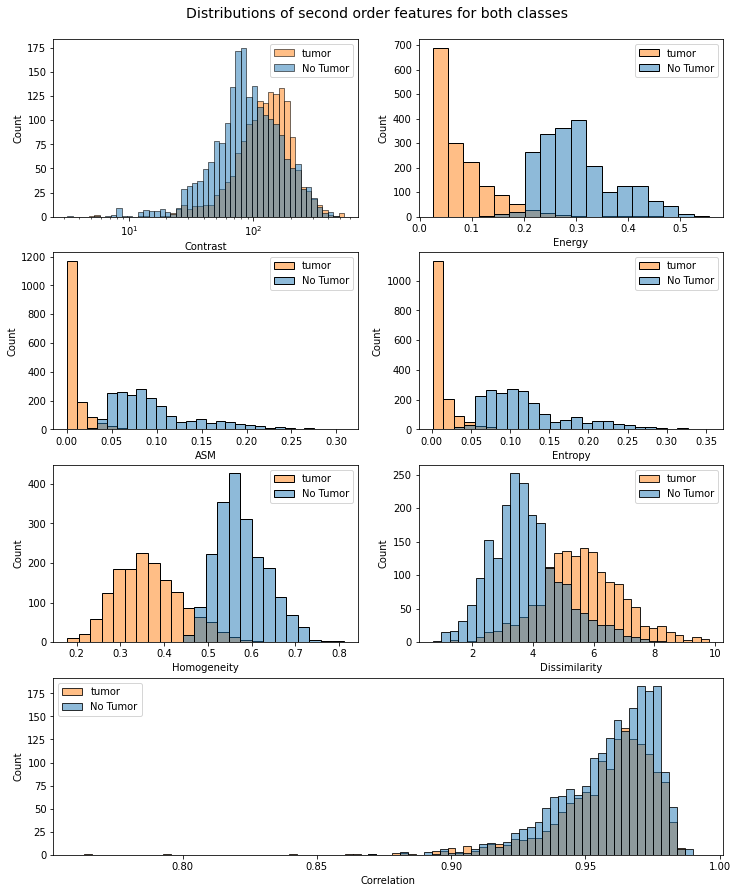

In [ ]:
plt.figure(figsize=(12,15))
plt.suptitle('Distributions of second order features for both classes', fontsize=14, y=0.91)
plt.subplot(4,2,1)
sns.histplot(data = df, x = 'Contrast', log_scale=True, hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,2,2)
sns.histplot(data = df, x = 'Energy', hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,2,3)
sns.histplot(data = df, x = 'ASM', hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,2,4)
sns.histplot(data = df, x = 'Entropy', hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,2,5)
sns.histplot(data = df, x = 'Homogeneity', hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,2,6)
sns.histplot(data = df, x = 'Dissimilarity', hue = 'Class')
plt.legend(['tumor','No Tumor'])
plt.subplot(4,1,4)
sns.histplot(data = df, x = 'Correlation', hue = 'Class')
plt.legend(['tumor','No Tumor']);

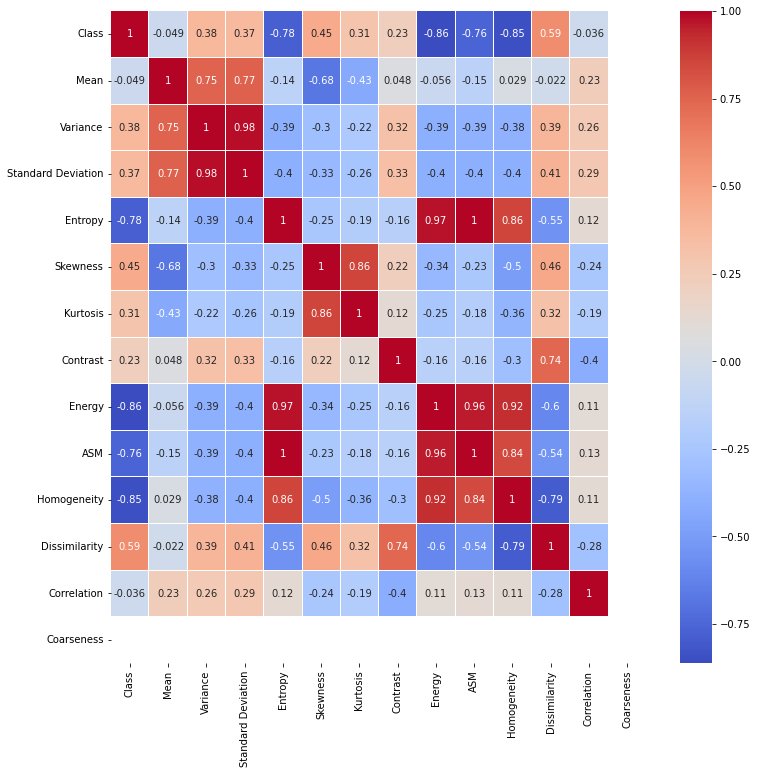

In [ ]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),linewidths=.01,cmap="coolwarm",annot=True)
plt.show()

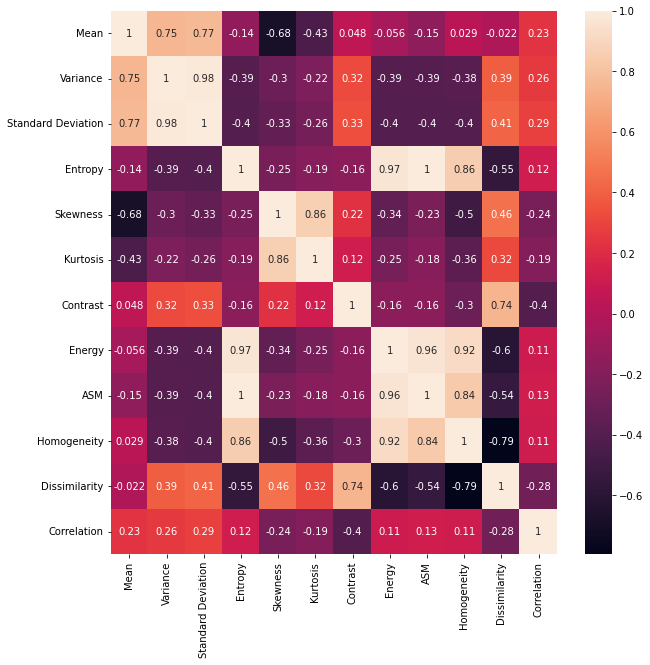

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True);

**The most correlated ones with target variable are Skewness, Variance, Standard Deviation**

**The least correlated ones are Mean, ASM, Energy, Homogeneity, Enthropy**

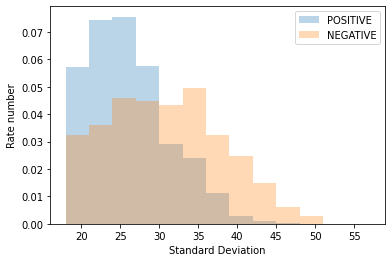

In [ ]:
plt.hist(df.loc[pos_tum, 'Standard Deviation'], label='POSITIVE',
         bins=np.arange(18, 60, 3),alpha=0.3, density=True)
plt.hist(df.loc[~pos_tum, 'Standard Deviation'], label='NEGATIVE',
         bins=np.arange(18, 60, 3), alpha=0.3, density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Rate number')
plt.legend()
plt.show()

#Balancing the data

In [ ]:

X = df.drop(columns = 'Class')

In [ ]:
X

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3590,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3591,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3592,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [ ]:
# Arrange data into features matrix & target vector
X = df.drop(columns = 'Class')
y = df['Class']


#Stratify to make sure we have the same class balance in train and test sets.
X_train, X_test, idx_tr, idx_te, y_train, y_test = train_test_split(
    X, X.index, y, random_state=42, stratify=y)

In [ ]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
#recombine X_train and y_train for oversampling
train_df = X_train.copy()
train_df['Class'] = y_train


#Find the difference in the classes
malignant = y_train == 1
benign = y_train == 0
num_needed_samples = abs(malignant.sum() - benign.sum())
num_needed_samples

395

In [ ]:
new_samples = train_df[train_df['Class'] == 1].sample(num_needed_samples, replace=True)
new_samples.shape

(395, 14)

In [ ]:
X_test.shape

(899, 13)

In [ ]:
train_df = pd.concat([train_df, new_samples])
train_df['Class'].value_counts()

1    1545
0    1545
Name: Class, dtype: int64

In [ ]:
#Now we will resplit our X and y.
X_train_balanced = train_df.drop(columns='Class')
y_train_balanced = train_df['Class']

In [ ]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, idx_tr, idx_te, y_train, y_test = train_test_split(
    X, X.index, y, random_state=42, stratify=y)

In [ ]:
X_test.shape

(899, 13)

**Logistic Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Make an instance of the model
logreg = LogisticRegression(C = 10, max_iter=1000)

# Scaling logistic regression
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_balanced)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train_balanced)
X_test = scaler.transform(X_test)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X_train_balanced,y_train_balanced)


LogisticRegression(C=10, max_iter=1000)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


true label:  1
pred label:  1
true label:  0
pred label:  0
true label:  1
pred label:  1


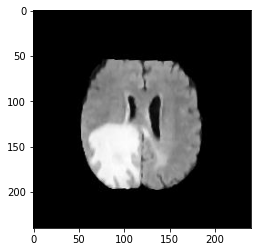

In [ ]:


plot_res(logreg)

In [ ]:

X_train.shape

(3090, 13)

In [ ]:
X_test = scaler.transform(X_test)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
logreg.score(X_train_balanced, y_train_balanced)


0.9825242718446602

In [ ]:
logreg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.44271412680756395

In [ ]:
df


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3590,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3591,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3592,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.951000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.949000 (0.025212) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.943000 (0.026602) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.945667 (0.024039) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.949333 (0.025289) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.947000 (0.025839) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.946000 (0.024166) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.950000 (0.023805) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.948000 (0.024549) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.947000 (0.023402) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.950000 (0.023944) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.949667 (0.023732) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.947667 (0.022610) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.950000 (0.021134) wi

In [ ]:
model = LogisticRegression(solver='liblinear', C=1000)
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
 model.score(X_train_balanced, y_train_balanced)
 

0.984789644012945

In [ ]:
model.score(X_test, y_test)

0.6718576195773082

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predictions = knn.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
score = knn.score(X_train_balanced, y_train_balanced)
score

1.0

In [ ]:
# calculate classification accuracy
score1 = knn.score(X_test, y_test)
score1

0.5728587319243604

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970000 using {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.882333 (0.035184) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.882333 (0.035184) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.929667 (0.030275) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.929667 (0.030275) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.944667 (0.025914) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.944667 (0.025914) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.955667 (0.022462) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.955667 (0.022462) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.963667 (0.024424) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.963667 (0.024424) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.964667 

In [ ]:
model1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
model1.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
X_test = scaler.transform(X_test)
y_pred = model1.predict(X_test)

In [ ]:
X_test.shape

(899, 13)

In [ ]:
 model1.score(X_train_balanced, y_train_balanced)

0.8566343042071197

In [ ]:
model1.score(X_test, y_test)

0.5728587319243604

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree

dec_tree.fit(X_train_balanced, y_train_balanced)

dec_tree.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [ ]:
X_test.shape

(899, 13)

In [ ]:
# calculate classification accuracy
train_score = dec_tree.score(X_train_balanced, y_train_balanced)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.9443826473859844


In [ ]:
param_dict={'criterion':['gini','enthropy'],'max_depth':range(1,10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,5)}

In [ ]:
grid=GridSearchCV(dec_tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train_balanced,y_train_balanced)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   52.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'enthropy'],
                     

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
test_score =grid.score(X_test, y_test)

In [ ]:
print(test_score)

0.9443826473859844


In [ ]:
grid.best_score_

0.9860841423948219

#Boosting

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

**eXtreme Gradient Boosting**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test.shape

(899, 13)

In [ ]:

pred=xgb.predict(X_test, validate_features=False)

In [ ]:
# calculate classification accuracy
train_score = xgb.score(X_train_balanced, y_train_balanced)

print(train_score)
print(test_score)

0.9957928802588997
0.9443826473859844


## LightGBM

In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_balanced,y_train_balanced)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print('Training accuracy:', lgbm.score(X_train_balanced, y_train_balanced))
print('Testing accuracy:', lgbm.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9443826473859844


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix, precision_score, recall_score

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
ohe = OneHotEncoder()
scaler = StandardScaler()

#column_selectors to tell the column transformers which columns to apply which preprocessing to
category_selector = make_column_selector(dtype_include='object')
number_selector = make_column_selector(dtype_include='number')

#list of (transformer, columns) tuples
transformers = [(ohe, category_selector), (scaler, number_selector)]

#column transformer
column_transformer = make_column_transformer((ohe, category_selector), (scaler, number_selector))

#create a preprocessing pipeline to add to a later estimator pipeline
preprocessing_pipeline = make_pipeline(column_transformer)

In [ ]:
def make_confmat(y_true, y_pred, labels=None, savepath=None, cmap='Greens',
                 normalize='true'):
  conf_mat = confusion_matrix(y_true, y_pred, normalize=normalize)
  figure = sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, 
                       annot=True, cmap=cmap)
  if savepath:
    plt.savefig(savepath)
  return figure

In [ ]:
labels = ['1','0']
lgb_pipe = make_pipeline(preprocessing_pipeline, LGBMClassifier())
lgb_pipe.fit(X_train_balanced, y_train_balanced)
y_hat = lgb_pipe.predict(X_test)
print(classification_report(y_test, y_hat))
conf_mat = make_confmat(y_test, y_hat, labels=labels)
conf_mat

In [ ]:

import tqdm
import re

In [ ]:

!unzip archive\ \(1\).zip

In [ ]:

ans = pd.read_csv('Brain Tumor.csv')

In [ ]:
!ls

'archive (1).zip'  'Brain Tumor.csv'    sample_data
'Brain Tumor'	    bt_dataset_t3.csv


In [ ]:
ans

In [ ]:
img_lst = []
target_lst = []
for file in tqdm.tqdm(os.listdir('Brain Tumor/Brain Tumor/')):
  
  number = re.findall(r'\d+', file)
  img = mpimg.imread(os.path.join('Brain Tumor/Brain Tumor/', file))
  
  target = ans[ans['Image'] == 'Image' + number[0]]['Class'].values
  if not len(target):
    continue
  target_lst.append(target[0])
  img_lst.append(img)

100%|██████████| 3762/3762 [00:07<00:00, 481.47it/s]


In [ ]:
X = np.array(img_lst) / 256.

In [ ]:

len(target_lst)

3762

In [ ]:
X.shape

(3762, 240, 240, 3)

In [ ]:
del(X)

In [ ]:
import gc
gc.collect()

760

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, target_lst, test_size=0.3)

In [ ]:
len(ytest)

494

In [ ]:
len(Xtest)

494

In [ ]:
?layers.Conv2D

In [ ]:
model = Sequential()
model.add(layers.Conv2D(4, (3, 3), strides=2, activation='relu',
                        input_shape=(240, 240, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), strides=2, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), strides=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary(
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 119, 119, 4)       112       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 59, 59, 4)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 8)         296       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 8)           584       
                                                                 
 flatten_4 (Flatten)         (None, 288)              

In [ ]:
del(model)

In [ ]:

gc.collect()

2683

In [ ]:
model.compile(optimizer='adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])
history = model.fit(Xtrain, np.array(ytrain), epochs=10, batch_size=8, 
                    validation_data=(Xtest, np.array(ytest)))

Epoch 1/10
330/330 [==============================] - 6s 16ms/step - loss: 0.5207 - accuracy: 0.7619 - val_loss: 0.4897 - val_accuracy: 0.7671
Epoch 2/10
330/330 [==============================] - 4s 12ms/step - loss: 0.4356 - accuracy: 0.8116 - val_loss: 0.4766 - val_accuracy: 0.7777
Epoch 3/10
330/330 [==============================] - 4s 11ms/step - loss: 0.3792 - accuracy: 0.8401 - val_loss: 0.3427 - val_accuracy: 0.8512
Epoch 4/10
330/330 [==============================] - 3s 10ms/step - loss: 0.3332 - accuracy: 0.8671 - val_loss: 0.3367 - val_accuracy: 0.8485
Epoch 5/10
330/330 [==============================] - 3s 10ms/step - loss: 0.2963 - accuracy: 0.8807 - val_loss: 0.3415 - val_accuracy: 0.8477
Epoch 6/10
330/330 [==============================] - 3s 10ms/step - loss: 0.2813 - accuracy: 0.8864 - val_loss: 0.4055 - val_accuracy: 0.8202
Epoch 7/10
330/330 [==============================] - 3s 10ms/step - loss: 0.2603 - accuracy: 0.8944 - val_loss: 0.2458 - val_accuracy: 0.8955

In [ ]:
gc.collect()

1916

In [ ]:

def plot_res():
  idx_here = np.random.randint(0, 100, size=15)
  for i, id in enumerate(idx_here):
    imgplot = plt.imshow(Xtest[id])
    plt.show()
    if (ytest[id]):
      print('Malignant')
    else:
      print('Benign')
    #print('pred label: ', pred[i])
    

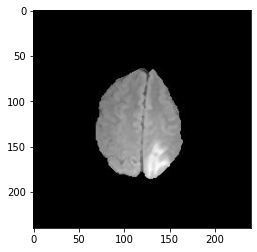

Malignant


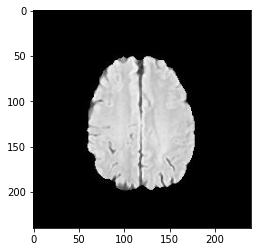

Benign


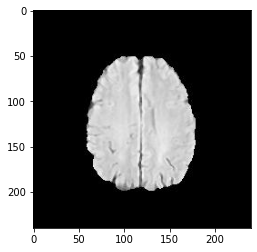

Benign


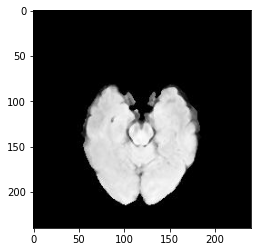

Benign


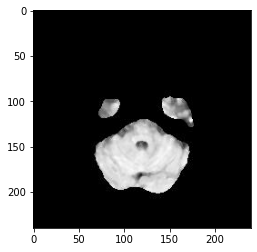

Benign


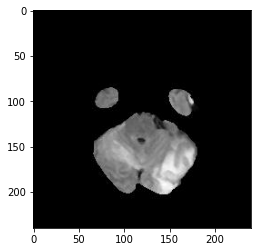

Malignant


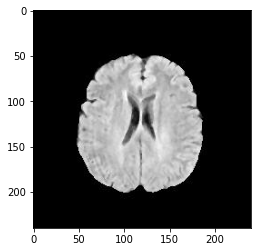

Benign


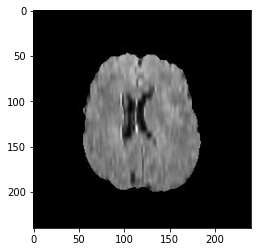

Benign


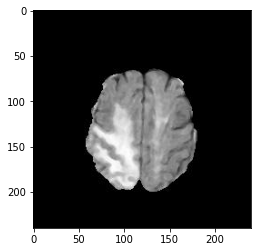

Malignant


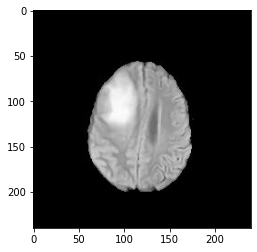

Malignant


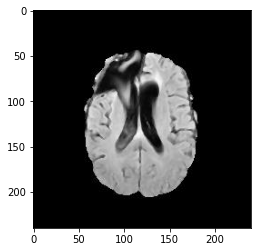

Benign


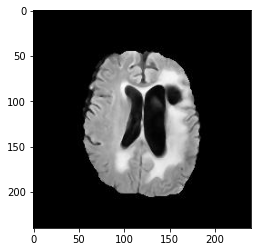

Malignant


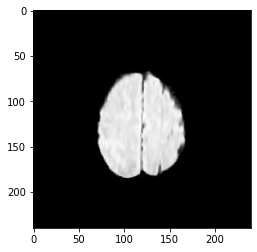

Benign


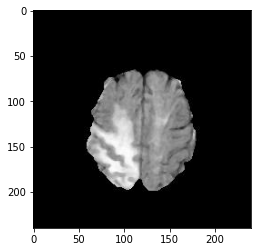

Malignant


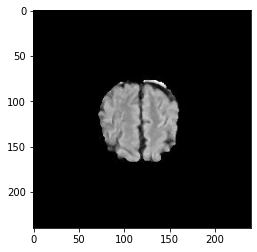

Benign


In [ ]:
plot_res()